# Aplicación de modelo K-means para agrupar clientes según patrones de consumo

*nota: por motivos de privacidad, se eliminan todo tipo de identificadores y se restringe el acceso al dateset, por ende el código no es ejecutable. Además, se toma una muestra de clientes, no el total de la población.

Se busca completar los siguentes objetivos : 

1. cargar un data frame con los datos de ordenes en formato de una fila por cada item de una factura.
2. limpiar y transformar dichos datos para obtener metricas agregadas que representen la totalidad del historial de compras del un tercero, especialmente el gasto por categoria de producto.
3. generar agrupaciones de clientes a partir de k-means clustering para determinar caracterisitcas comunes entre ellos, y así poder crear estrategias de comunicación e email marketing con el objetivo de aumentar las ventas.


In [1]:
## importar pandas
import pandas as pd
from datetime import datetime

In [2]:
## crear data frame original

df = pd.read_csv('orders.csv')
pd.set_option('display.max_columns', None)


In [3]:
## eliminar información del dataframe
df.drop(["Billing Company Name","Billing Country","Billing State","Billing Street Name&Number","Billing Zip Code","Delivery Company Name","Coupon","Delivery Country","Delivery State","Delivery City","Delivery Street Name&Number","Delivery Zip Code","Fulfiller","Tracking Number","Shipping Phone","Shipping Label","Delivery Method","Item's Variant","SKU","Item's Weight","Item's Custom Text","Notes to Seller","Currency","Payment Method","Payment","Fulfillment","Refund","Total after refund","Qty refunded", "Billing Customer", "Billing City", "Delivery Customer", "Billing Phone", "Buyer's Email"], inplace = True, axis=1)


In [4]:
## limpiar el texto de los items para estandarizar
df["Item's Name"] = df["Item's Name"].apply(lambda x: x.lower())
df["Item's Name"].replace(to_replace = '[á]', value = 'a', regex = True, inplace = True)
df["Item's Name"].replace(to_replace = '[í]', value = 'i', regex = True, inplace = True)
df["Item's Name"].replace(to_replace = '[é]', value = 'e', regex = True, inplace = True)
df["Item's Name"].replace(to_replace = '[ó]', value = 'o', regex = True, inplace = True)
df["Item's Name"].replace(to_replace = '[ú]', value = 'u', regex = True, inplace = True)
df["Item's Name"].replace(to_replace = '[ú]', value = 'u', regex = True, inplace = True)
df["Item's Name"].replace(to_replace = '[^a-z0-9 ]', value = '', regex = True, inplace = True)
df["Item's Name"] = df["Item's Name"].str.strip()






In [5]:
## parse dates y obtener la hora de la compra

df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x,"%b %d, %Y"))
df['Time'] = df['Time'].apply(lambda x: datetime.strptime(x,"%I:%M:%S %p"))
df['Time'] = df['Time'].apply(lambda x: x.hour)

In [6]:
##limpiar columna additional Info
df["Additional Info"].replace(to_replace = "[^0-9]+", value = '', regex = True, inplace = True)
df["Additional Info"].replace(to_replace = "", value = float("NaN"), regex = True, inplace = True)
df.dropna(subset = ["Additional Info"], inplace = True)

In [7]:
## crear función para clasificar cada producto 

def asignar_categoria(fila):
    
    cuidado_bucal = [ 'cepillo de dientes ecologico',
  'seda dental biodegradable',
  'crema de dientes',
  'crema dental natural',
  'kit refrescante',
  'shampoo en barra 98gr',
  'cepillo de dientes para nios',
  'cepillo de dientes ecologicos para nios',
  'seda dental ecologica biodegradable 30 mts',
  'crema dental natural verde ritual 120 gr',
  'repuesto seda ecologica',
  'raspador de lenguas',
  'crema dental  denti essence blanco total 90 gr',
  'la familia kit',
  'raspador de lengua',
  'crema dental  denti essence ultra refrescante 90 gr',
  'limpiador de lengua en cobre',
  'crema dental',
  'spray refrescante oral',
  'cepillo de dientes en bambu ecologico ecosapiens',
  'repuesto seda dental ecologica 30 mt',
  'cepillo de dientes de bambu para nios ecologicos',
  'cepillo de dientes de bambu para nios ecologico',
  'spray refrescante oral denti essence 25 ml',
  'spray refrescante oral denti essence 25ml',
  'mouth kit',
  'seda dental biodegrdabale',
  'repuesto seda ecologica 30 mt',
  'repuesto seda dental',"crema dental",
"raspador de lenguas",
"mouth kit",
"repuesto seda dental",
"cepillo de dientes para nios",
"seda dental biodegrdabale",
 ]
    
    afeitado = [ 'maquina de afeitar',
  'repuesto de cuchillas x 5 und',
  'afeitalo kit',
  'maquina de afeitar clasica de una hoja',
  'repuesto de cuchillas  x 5 und',
  'jabon para afeitar',
  'repuestos de cuchillas  x 5 und para maquina de afeitar',
  'aceite para la barba',
  'barbera navaja de madera',
  'kit afeitalo',
  'maquina de afeitar premium',
  'shaving kit',
  'barbera para afeitar de madera',
  'barbera de madera',
  'aceite para la barba 30 ml',
  'crema para afeitar solida  montesol 50 gr',
  'afeitalo kit',
  'kit el jefecito',
  'jabon para afeitar natiu 95 gr',
  'barbera navaja de madera',
  'kit papa oso',
  'aceite barba club man',
  'espuma de afeitar', "barbera navaja de madera",
"jabon para afeitar",
"kit papa oso",
"shaving kit",
"afeitalo kit"
]
    
    cuidado_capilar = [ 'cepillo de bambu para cabello',
  'cepillo de dientes de bambu ecologico ecosapiens',
  'shampoo en barra',
  'peine de bambu',
  'shampoo cabello mixto',
  'shampoo cabello crespo',
  'shampoo cabello graso',
  'shampoo cabello seco',
  'cepillo de bambu',
  'cepillo de madera para el cabello cuadrado',
  'acondicionador montesol 60 gr',
  'shampoo de carbon activado y moringa',
  'shampoo en barra montesol 98 gr',
  'acondicionador en barra montesol  60 gr',
  'shampoo en barra asava para cabello graso  90 gr',
  'shampoo en barra asava de carbon activado para cabello mixto 90 gr',
  'shampoo en barra asava para cabello seco 90 gr',
  'peine de bambu ecosapiens corto',
  'shampoo en barra hierbabuena montesol 100gr',
  'shampoo en barra asava para cabello crespo 90 gr',
  'shampoo chontaduro',
  'shampoo en barra montesol 100gr',
  'acondicionador',
  'kit capilar',
  'peine de bambu',
  'shampoo en barra',
  'peine largo de bambu',
  'shampoo de carbon activado y sasha inchi',
  'shampoo en barra cafe montesol 100gr',
  'peine de bambu ecosapiens largo',
  'peine de bambu largo',
  'despelucate kit',
  'peines de bambu',
  'tratamiento capilar con aceite de coco nara 200 gr',
  'tratamiento capilar con aceite de coco nara',
  'kit melena salvaje',
  'acondicionador montesol  60 gr',
  'kit capilar',"peine de bambu",
"shampoo en barra",
"acondicionador",
"kit capilar",
]
    
    cuidado_corporal = [ 'copitos x 100 und',
  'jabon corporal de coco',"jabon de avena y manzanilla",
'desodorante en barra',
  'copitos ecologicos x 100 und',
  'luffa  estropajo',
  'desodorante en crema',
  'protector solar 60 gr',
  'desodorantes sin aluminio',
  'copitos ecologicos x 200 und',
  'desodorante natural de piedra alumbre natural conexion',
  'desodorante natural de piedra alumbre',
  'desodorante en barra ocre 20 gr',
  'desodorante natural',
  'jabon exfoliante de cafe y cacao',
  'repelente natural 100 ml',
  'aceite anticelulitico 200 ml',
  'desodorante barra',
  'protector solar de uva spf 50',
  'cepillo de cactus',
  'protector solar natural conexion 60 gr',
  'jabon corporal coco  rosas 100gr',
  'crema hidratante corporal coco nara',
  'desodorante en roll on 60 ml',
  'desodorante piel sensibleocre limoncillo 20 gr',
  'desodorante artesanal en crema 30 gr',
  'crema corporal  200ml',
  'crema dental denti essence',
  'repelente natural',
  'jabon corporal carbon activado nara',
  'protector solar de uva spf 50 natural conexion 60 ml',
  'jabon corporal nara coco arcilla verde 110 gr',
  'crema corporal 1litro',
  'desodorante en rollon',
  'jabon corporal de coco nara',
  'repelente natural  100 ml',
  'cepillo de cactus para masajes',
  'kit paal ecologico  4 filtros',
  'jabon para nios avena y manzanilla',
  'desodorantes sin aluminio 90ml',
  'jabon corporal artesanal',
  'el aventurero kit',
  'aceite de rosa mosqueta',
  'protector solar de uva y argan',
  'jabones corporales naturales',
  'crema extra humectante corporal nara con aceite de coco 440 gr',
  'crema corporal capri  500 ml',
  'colonia solida  montesol',
  'crema corporal  capri 500 ml',
  'jabon corporal coco  rosas nara 100gr',
  'jabon corporal nara coco y arcilla roja 100 gr',
  'jabon exfoliante de cafe y cacao natiu  95 gr',
  'crema extra humectante corporal con aceite de coco nara 440 gr',
  'jabon corporal nara coco arcilla verde',
  'paales ecologicos  1 filtro',
  'filtro protector para paales en bambu',
  'jabon liquido corporal a base de miel',
  'crema corporal  60ml',
  'jabones naturales',
  'jabon liquido para manos ecologico elemental',
  'guante exfoliante de luffa estropajo',
  'jabon corporal de coco',
  'crema hidratante facial rosa silvestre pachha 40gr',
  'protector solar de uva',
  'jabon de menta',
  'disco exfoliante de luffa estropajo',
  'colonia solida  montesol 40 gr',
  'gel antibacterial ecologico elemental',
  'jabon corporal nara coco arcilla verde eucalipto y menta',
  'desodorante para hombre sin aluminio 60ml',
  'crema corporal',"jabon corporal de coco",
"mascarilla detox con carbon activado",
"aceite anticelulitico 200 ml",
"ungento de calendula",
"ungento de cannabis y aji",
"balsamo reparador",
"jabon exfoliante de cafe y cacao",
"bao herbal",
"jabon detox de carbon activado",
"sales para bao lavanda y tomero",
"aceite de rosa mosqueta",
"jabon para nios avena y manzanilla"
 ]
    
    cuidado_facial = [ 'toallitas desmaquilladoras reutilizables',
  'rodillos faciales',"jabon facial antiacne te rojo aceite de ricino y geranio",
  'esponja facial de konjac',
  'serum vitamina c',
  'jabon facial antiacne te rojo aceite de ricino y geranio',
  'toallitas desmaquilladoras reutilizables x 7',
  'serum reparador nocturno',
  'jabon detox de carbon activado',
  'tratamiento anti acne',
  'jabon facial calendula manzanilla y miel',
  'concentrado de acido hialuronico',
  'mascarilla anti acne',
  'jabones faciales',
  'tonicos faciales 120 ml',
  'toallitas faciales',
  'rodillos de jade',
  'limpiador facial bifasico calendula 100 ml',
  'mascarilla peel off aloe vera y calendula',
  'green mask',
  'jabon facial aloe vera',
  'kit dia y noche  contorno de ojos',
  'tonicos faciales',
  'crema facial de rosa mosqueta',
  'lan serum regenerador',
  'mascarilla floral',
  'aceite limpiador facial',
  'contorno de ojos uva',
  'ungento de cannabis y aji',
  'crema con aceite de rosa mosqueta',
  'roll on antiacne',
  'jabon facial en barra de aloe vera natural conexion 100 gr',
  'jabon facial avena leche y miel',
  'jabones faciales en barra',
  'esponjas faciales',
  'ungento de calendula',
  'contorno de ojos uva 30 gr',
  'jabon de avena y manzanilla',
  'jabones faciales 100 gr',
  'jabon facial en barra de calendula natural conexion 100 gr',
  'gel contorno de ojos pachha',
  'jabon facial azucenas',
  'crema facial rosa silvestre 40gr',
  'serum facial hidratante banano biotina 20 ml',
  'arbre  the tratamiento antiacne olibanum 10 ml',
  'limpiador facial bifasico calendula ocre 100 ml',
  'contorno de ojos algas marinas y castao de indias 20 ml',
  'esponja facial de konjac',
  'serum antiedad  60 ml',
  'limpiador facial bifasico calendula',
  'jabon facial miel y calendula',
  'jabon detox de carbon activado natiu  95 gr',
  'serum facial reparador nocturno pachha  arbol de te 20 ml',
  'serum facial vitamina cacido ferulico y camu camu 20 ml',
  'crema facial hidratante rosa silvestre pachha 50gr',
  'jabon faciales de miel',
  'serum facial vitamina c acido ferulico y camu camu 20 ml',
  'serum facial reparador nocturno pachha  arbol de te',
  'serum antiedad',
  'contorno de ojos',
  'gel contorno de ojos pachha 15 gr',
  'toallitas faciales reutilizables x 3',
  'jabon facial hiperhidratante  anti age natiu 95 gr',
  'tonico facial agua de rosas 120 ml',
  'contorno de ojos de uva  natural conexion 30 gr',
  'sleeping mask agua de coco y sandia',
  'rodillo facial de jade',
  'crema facial de rosa mosqueta y aceite de argan dermanat 30 ml',
  'jabon facial anti acne te rojo aceite de ricino y geranio  natiu 95 gr',
  'lan serum regenerador olibanum botanica 20 ml',
  'serum antiarrugas vitamina c dermanat 30 ml',
  'crema hidratante facial rosa silvestre pachha 50gr',
  'kit drgrinch',
  'ungento de rosas',
  'jabones faciales de miel',
  'serum regenerador',
  'jabon facial en barra de azucenas natural conexion 100 gr',
  'serum revitalizante kombucha vitamina a retinol 20 ml',
  'jabon facial en barra de avena leche y miel natural conexion 100 gr',
  'serum antiedad natural conexion 60 ml',
  'serum facial calmante pachha 20ml',
  'toallitas faciales reutilizables',
  'tonico facial calendula natural conexion 120 ml',
  'serum  facial reparador nocturno pachha  arbol de te',
  'serum facial calmante 20ml',
  'jabones facial aloe vera',
  'kit piel radiante',
  'serum antimanchas',
  'kit basico facial',
  'green mask dermanat 110 ml',
  'rodillo facial de cuarzo rosado',
  'esponja facial desmaquilladora',
  'jabon de avena y manzanilla natiu 95 gr',
  'jabones faciales de coco avena  miel yo cafe',
  'serum reparador nocturno dermanat 30 ml',
  'concentrado de acido hialuronico dermanat',
  'tonico facial te verde natural conexion 120 ml',
  'jabon faciales de coco  avena  calendula',
  'mascarilla detox con carbon activado',
  'kit piel de seda',
  'poderosa kit',
  'serum exfoliante uvavitamina b3 20 ml',
  'jabones faciales de cocoavenamiel yo cafe',
  'filles en fleurs mascarilla floral exfoliante olibanum botanica',
  'jabon facial anti acne purify natiu 95 gr',
  'la mer mascarilla descongestionante  olibanum botanica',
  'jabon facial anti hiperhidratante  age natiu 95 gr',
  'ungento de cannabis y aji ocre 40 gr',
  'eclatante limpiador facial olibanum botanica 30 ml',
  'jabon faciales de coco  avena  miel',
  'serum facial reparador amazonico',
  'esponjas faciales desmaquilladoras',
  'tonico facial uva natural conexion 120 ml',
  'kit dia y noche  contorno de ojos dermanat',
  'eclatante limpiador facial olibanum botanica',
  'jabon facial calendula y miel',
  'kit pieles jovenes',
  'tratamiento antiacne',"jabon faciales de coco  avena  calendula",
"esponjas faciales",
"esponja facial de konjac",
"jabon facial avena leche y miel",
"jabones facial aloe vera",
"jabon facial calendula y miel","kit piel radiante"
 ]
    
    cocina = [ 'pitillos de acero  limpiador',
  'fundas para pitillos',
  'filtro para leche vegetal',
  'pitillos de vidrio  limpiador',
  'set cubiertos bambu',
  'envolturas reutilizables para alimentos',
  'kit cubiertos  estuche  pitillo  limpiador',
  'aceite de coco chocoano 230 gr',
  'miel de abejas 250 gr',
  'miel 500 gr',
  'aceite de coco chocoano  170 gr',
  'curcuma 80 gr',
  'pitillo de acero  limpiador',
  'estuche para cubiertos',
  'ghee 200 gr',
  'envolturas para alimentos reutilizables ecowraps',
  'lavanda',
  'mantequilla de mani 370 gr',
  'curry',
  'paprika',
  'ghee 170 gr',
  'miel 250 gr',
  'conservas de miel',
  'sabores ancestrales kit',
  'ghee 500 gr',
  'sal picante',
  'sales con hierbas para condimentar',
  'ghee mantequilla clarificada 230 gr',
  'ghee 230 gr',
  'romero',
  'ghee 229 gr',
  'pitillos de acero inoxidable',
  'conservas de miel quibee',
  'golden mix  leche dorada',
  'te chai chamba mixtura',
  'curry 65 gr',
  'ghee 250 gr',
  'curcuma 110 gr',
  '3 x paquetes pasta chia',
  'aceite de coco 230 ml',
  'rosquillas integrales',
  'rosquillas veganas',
  'aji picante organico 20 gr',
  'ajonjoli descortezado 100 gr',
  'oregano organico 20 gr',
  'limpiador de pitillo',
  'pitillo de acero  limpiador  funda',
  'funda para pitillo',
  'set cubiertos en bambu',
  'aromatica limoncillo',
  'curcuma 70 gr',
  'sales de hierbas picante',
  'ajonjoli',
  'sachets lavanda',
  'aji picante 20 gr',
  'oregano',
  'limoncillo',
  'pasta chia',
  'aceite de coco chocoano  185 ml',
  'te con spirulina rooibos y flor de jamaica',
  'curcuma 60 gr',
  'fruta desidratada',
    'pimienta blanca',"conservas de miel ",
"envolturas reutilizables para alimentos ",
"sabores ancestrales kit ","lavanda",
"romero"
]
    
    maquillaje = [ 'serum pestaas',
  'balsamo labial',
  'labial',
  'set de brochas en bambu para maquillar',
  'rubor',
  'kit repador de labios pachha',
  'serum para pestaas y cejas',
  'polvo suelto',
  'balsamo labial  asava 12 gr',
  'labial ocre 6 gr',
  'set de brochas en bambu para maquillar',
  'polvo suelto ocre 20 gr',
  'balsamo labial pachha 15 gr',
  'brochas de maquillaje en bambu',
  'rubores veganos',
  'polvos veganos',
  'rubor ocre 7 gr',
  'labiales veganos',"set de brochas en bambu para maquillar",
"brochas de maquillaje en bambu",
"rubor",
"polvo suelto",
]
    
    cuidado_intimo = [ 'kit protectores diarios reutilizables x 3',
  'copa menstrual',
  'kit protectores de tela x 3',
  'protectores diarios reutilizables',
  'kit toallas higienicas diarias reutilizables x 3',
  'kit toallas de tela reutilizables x 3',
  'toallas de tela reutilizables',
  'kit toallas higienicas ecologicas x 3',
  'protectores de tela',
  'protector de tela reutilizable',
  'toallas higienicas detela reutilizables',
  'kit toallas higienicas reutilizables x 3',
  'copa menstrual ecolunas',
  'toalla higienica de tela reutilizable',
  'kit toalla higienicas ecologicas x 3',
  'protectores de tela reutilizables',
  'crema intima femenina mixtura' ]
    
    mascotas = [ 'bolsas biodegradables para mascotas',
  'bolsas biodegradables mascotas compostpack x 30 und',
  'protector patas',
  'shampoo perro',
  'shampoo gato',
  'balsamo reparador',
  'balsamo protector de patas 15gr',
  'shampoo para perro ecologico',
  'balsamo reparador para mascotas 30gr',
  'shampoo para gato ecologico',
  'balsamo protector de patas',
  'bolsas biodegradables para mascotas  compostpack x 30 und' ]
    
  
    
    
    bienestar = [ 'set de cristales',
  'splash con aceites esenciales y cristales 100 ml',
  'aceite corporal para masajes 30 ml',
  'aceite corporal para masajes con aceites esenciales y cristales  50 ml',
  'aceite corporal para masajes con aceites esenciales y cristales  30 ml',
  'ducha de vapor eucalipto',
  'cojin termico largo',
  'splash aceites esenciales',
  'bao herbal',
  'sahumerio',
  'aceite esencial de eucalipto',
  'vela de vainilla con cristales y flores silvestre',
  'velas para masajes',
  'vela de vainilla con cristales y flores silvestres',
  'kit ritual de limpieza y purificacion',
  'splash conexion abundancia',
  'aceite esencial lavanda menta herbario',
  'aceite esencial arbol de te menta herbario',
  'set de 7 cristales',
  'kit splash 100 ml',
  'sahumerio grande',
  'aceite esencial menta menta herbario',
  'bao herbal',
  'oleato de cannabis  y cristales',
  'sales para bao lavanda y romero',
  'kit svaasty',
  'sahumerio pequeo',
  'kit splash',
  'pronto alivio 60 gr',
  'splash limpieza aurica',
  'splash tantra',
  'splash descanso natural',
  'kit mama zen',
  'aceite esencial de cipres',
  'aceite esencial limon menta herbario',
  'splash aceites esenciales y cristales 100 ml',
  'bombas efervescentes para bao x  6und',
  'aceite esencial de romero',
  'set de cristales x 7',
  'caja de cristales x 9',
  'kit renovacion',
  'sales para bao lavanda y tomero',
  'kit ao nuevo',
  'splash aceites esenciales con cristales de 100 ml',
  'pronto alivio 250 gr',
  'aceite corporal para masajes descanso natural',
  'aceite corporal para masajes bienestar corporal',
  'aceites vegetales',
  'copia de pronto alivio 250 gr', "vela de vainilla con cristales y flores silvestre",
"sahumerio grande",
"humidificador ","set de cristales x 7",
"caja de cristales x 9"

]
    
    hogar = ['bolsitas de te',
  'bidet',
  'tijeras punta redonda',
  'bolso de tela enrrollable','lavaloza ecologico 500 ml',
  'limpiador frutas y verduras 500 ml',
  'bolsas de tela para verduras o lavadora',
  'jabon lava loza en barra ecologico 150 gr',
  'solidificador de aceite de cocina usado',
  'lavaloza ecologico',
  'limpiones multiusos reutilizables  x 5 und',
  'cepillo lavaloza de madera y fibra vegetal',
  'limpiador frutas y verduras',
  'esponja lavaloza ecologica x 3 und',
  'cepillo lavaloza de madera y fibra vegetal',
  'jabon de loza',
  'bolsas de tela para verduras o lavadora  x 3 und',
  'green loza lavaloza organico y natural 850 ml',
  'bolsas de tela para verduras o lavadora grande''kit x 4 bolsas reutilizables',
  'bolsas biodegradables mediana  hogar',
  'bolsas biodegradables grande  hogar',
  'jabon ecorey',
  'bolsas biodegradables medianas compostpack x 25 und',
  'limpia pisos',
  'bolsas biodegradables grandes mahiz x 10 und',
  'bolsas biodegradables grandes mahiz',
  'bolsas biodegradables medianas mahiz',
  'limpiador multiusos  500 ml',
  'bolsas biodegradables medianas mahiz x 10 und',
  'jabon lava ropa',
  'detergente para ropa biodegradable elemental',
  'bolsas biodegradables grandes compostpack x 10 und',
  'refil limpiavidrios ecologico',
  'detergente en polvo ecologico 1kg',
  'limpiador miltiusos',
  'detergente liquido nuez del jabon biodegradable 1000 ml',
  'refil limpiavidrios ecologico 530 ml',
  'limpiador facil bifasico calendula',
  'suavizante para ropa biodegradable elemental',
  'cepillo ropa','kit x 4 bolsas reutilizables','solidificador de aceite de cocina usado', 'bolsas de tela para verduras o lavadora grande',
'bolsas de tela para verduras o lavadora',"cepillo lavaloza de madera y fibra vegetal",
"jabon lava ropa"
] 
    
    otro = [ 'basic kit',
  'llevalo kit',
  'special kit',
  'el fletecito kit',
  'pa la cita kit',
  'zero waste kit',
  'kit taller economia circular',
  'radieuse','kit papa consciente', 'summer kit',"la familia kit",
"kit papa consciente",
"llevalo kit",
"kit ao nuevo",

]
    
    gadgets = [ 'porta celular',
  'termo de vidrio 500 ml',
  'termo de vidrio 450 ml',
  'termo de vidrio 550 ml',
  'termo de vidrio con difusor  450 ml',
  'mesa auxiliar de descanso pc',
  'bombillo led inalambrico',
  'humidificador' ]
    
    diseno = [ 'pijama shorty butterfly',
  'medias media luna',
  'tangas',
  'cangureras',
  'pijama shorty slutty',
  'sacos termicos',
  'pijama square',
  'pijama pretty flower']
    
    if fila in diseno:
        return 'diseño'
    elif fila in gadgets:
        return 'gadgets'
    elif fila in otro:
        return 'kits categorias varias'
    elif fila in hogar:
        return 'hogar'
    elif fila in bienestar:
        return 'bienestar'
    elif fila in mascotas:
        return 'mascotas'
    elif fila in cuidado_intimo:
        return 'cuidado intimo'
    elif fila in maquillaje:
        return 'maquillaje'
    elif fila in cocina:
        return 'cocina'
    elif fila in cuidado_facial:
        return 'cuidado facial'
    elif fila in cuidado_corporal:
        return 'cuidado corporal'
    elif fila in cuidado_capilar:
        return 'cuidado capilar'
    elif fila in afeitado:
        return 'afeitado'
    elif fila in cuidado_bucal:
        return 'cuidado bucal'
    else:
        return 'otro'

In [8]:
## crear la columna de categoria en el df
df['Categoria'] = df["Item's Name"].apply(lambda x: asignar_categoria(x))
## crear la columna subtotal producto
df['Subtotal Producto'] = df["Item's Price"] * df["Qty"]


# Obtener total gastado y  valor promedio de compra por tercero

In [9]:
df_ordenes_valores = df[['Additional Info', 'Order #', 'Total']]

df_ordenes_valores.drop_duplicates(subset = 'Order #', keep = 'last', inplace = True)
df_ordenes_valores['Total en todas las compras'] = df_ordenes_valores.groupby('Additional Info')['Total'].transform('sum')
df_ordenes_valores['Valor promedio de compra'] = df_ordenes_valores.groupby('Additional Info')['Total'].transform('mean')
df_ordenes_valores['std valor de compra'] = df_ordenes_valores.groupby('Additional Info')['Total'].transform('std')

df_ordenes_valores.fillna(0, inplace = True)

df_ordenes_valores.drop(['Order #', 'Total'], axis = 1, inplace = True)



<ipython-input-9-f2699f1659c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordenes_valores.drop_duplicates(subset = 'Order #', keep = 'last', inplace = True)
<ipython-input-9-f2699f1659c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordenes_valores['Total en todas las compras'] = df_ordenes_valores.groupby('Additional Info')['Total'].transform('sum')
<ipython-input-9-f2699f1659c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

# Proceso para crear dataframe con gasto por categoria de cada tercero

In [10]:
##crear un nuevo dataframe con columnas relevantes
df_gasto_categoria = df[['Subtotal Producto', 'Categoria', 'Additional Info']]


In [11]:
df_gasto_categoria = df_gasto_categoria.groupby(["Categoria",'Additional Info'],as_index=False)["Subtotal Producto"].sum()



In [12]:
df_porcentaje = pd.merge(df_gasto_categoria, df_ordenes_valores, on ='Additional Info', how = 'left')


In [13]:
## crear la columna con el valor en porcentaje del gasto por categoria
df_porcentaje['porcentaje de gasto por categoria'] = df_porcentaje['Subtotal Producto'] / df_porcentaje['Total en todas las compras']


In [14]:
## eliminar las columnas no relevantes
df_porcentaje.drop(['Total en todas las compras', 'Valor promedio de compra', 'Subtotal Producto'], axis = 1, inplace =  True)

In [15]:
## crear pivot table donde cada columna representa categorias distintas
df_porcentaje = df_porcentaje.pivot_table(index = "Additional Info", columns = "Categoria", values = "porcentaje de gasto por categoria")
## llenar valores NaN con 0
df_porcentaje.fillna(0,inplace = True)


In [16]:
## elimar columnas con valores null
df.dropna(subset = ['Additional Info'], inplace =True)

# crear datos agrupados relacionados con fechas para anexar a tabla principal


In [17]:
## obtener las diferencias en días entre una compra y otra

df_fechas = df[['Additional Info', 'Order #', 'Date', 'Time']]

In [18]:
## ordenar los datos según numero de orden y eliminar los duplicados para conservar detalles por factura
df_fechas.sort_values("Order #", inplace = True)
df_fechas.drop_duplicates(subset = 'Order #', inplace = True)


<ipython-input-18-d290f9dfe610>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas.sort_values("Order #", inplace = True)
<ipython-input-18-d290f9dfe610>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas.drop_duplicates(subset = 'Order #', inplace = True)


In [19]:
## ordenar los datos por ID y fecha 
df_fechas.sort_values(["Additional Info", "Date"], inplace = True)
df_fechas['Día de la semana'] = df_fechas.Date.dt.dayofweek
df_fechas['Día de compra (fecha)'] = df_fechas.Date.dt.strftime('%d').astype(int)



<ipython-input-19-9e65ca367051>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas.sort_values(["Additional Info", "Date"], inplace = True)
<ipython-input-19-9e65ca367051>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas['Día de la semana'] = df_fechas.Date.dt.dayofweek
<ipython-input-19-9e65ca367051>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [20]:
df_fechas.reset_index(drop = True, inplace = True)


In [21]:
## obetner la cantidad de días entre compras subsecuentes de un tercero
df_fechas['días entre compras'] = df_fechas.groupby('Additional Info')['Date'].transform('diff').dt.days



<ipython-input-21-3961c3aa45d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas['días entre compras'] = df_fechas.groupby('Additional Info')['Date'].transform('diff').dt.days


In [22]:
## obtener la fecha de la primera compra y de la compra más reciente por tercero
df_fechas['primera compra'] = df_fechas.groupby('Additional Info')['Date'].transform('min')
df_fechas['compra mas reciente'] = df_fechas.groupby('Additional Info')['Date'].transform('max')


<ipython-input-22-bfe049c3f534>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas['primera compra'] = df_fechas.groupby('Additional Info')['Date'].transform('min')
<ipython-input-22-bfe049c3f534>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas['compra mas reciente'] = df_fechas.groupby('Additional Info')['Date'].transform('max')


In [23]:
## Promedios de cada metrica de fecha relevante (para poder agregar los datos de clientes con más de una compra)
df_fechas['Promedio días entre compras']= df_fechas.groupby("Additional Info")['días entre compras'].transform('mean')
df_fechas['Promedio hora de compra']= df_fechas.groupby("Additional Info")['Time'].transform('mean')
df_fechas['promedio día de la semana'] = df_fechas.groupby("Additional Info")['Día de la semana'].transform('mean')
df_fechas['promedio día de compra (mes)'] = df_fechas.groupby("Additional Info")['Día de compra (fecha)'].transform('mean')


##llenar valores null con 0
df_fechas.fillna({'Promedio días entre compras':0, 'Promedio hora de compra':0,  'promedio día de compra (mes)':0}, inplace = True)

## eliminar duplicados y mantener la última observación por cada tercero
df_fechas.drop_duplicates(subset = 'Additional Info', keep = 'last', inplace = True)
## eliminar campos innecesarios o con información no agregada
df_fechas.drop(['días entre compras','Date', 'Order #', 'Time'], axis= 1, inplace = True)



<ipython-input-23-281f427ffbe8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas['Promedio días entre compras']= df_fechas.groupby("Additional Info")['días entre compras'].transform('mean')
<ipython-input-23-281f427ffbe8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fechas['Promedio hora de compra']= df_fechas.groupby("Additional Info")['Time'].transform('mean')
<ipython-input-23-281f427ffbe8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

# Obtener la cantidad de ordenes por tercero

In [24]:
df_ordenes_conteo = df[['Additional Info', 'Order #']]

In [25]:
df_ordenes_conteo.drop_duplicates(subset = 'Order #', keep = 'last', inplace = True)
df_ordenes_conteo['Cantidad de Ordenes'] = df_ordenes_conteo.groupby('Additional Info')['Order #'].transform('nunique')

df_ordenes_conteo.drop_duplicates(subset = 'Additional Info', keep = 'last', inplace = True)
df_ordenes_conteo.drop(['Order #'], axis= 1, inplace = True)

df_ordenes_conteo.sort_values(['Cantidad de Ordenes'], ascending = False, inplace = True)



<ipython-input-25-af4b8aa77517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordenes_conteo.drop_duplicates(subset = 'Order #', keep = 'last', inplace = True)
<ipython-input-25-af4b8aa77517>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ordenes_conteo['Cantidad de Ordenes'] = df_ordenes_conteo.groupby('Additional Info')['Order #'].transform('nunique')
<ipython-input-25-af4b8aa77517>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

# Iniciar proceso de juntar toda la info en un único df

In [26]:
## Código para aplicar merge y crear un df final con todas las anteriores
from functools import reduce

data_frames = [df,df_fechas,df_ordenes_conteo,df_ordenes_valores,df_porcentaje]
df_final = reduce(lambda left, right: pd.merge(left, right, on=['Additional Info'], how = 'left'),data_frames)


df_final.drop_duplicates(subset = 'Additional Info', keep = 'last', inplace = True)
df_final.sort_values(by=['Cantidad de Ordenes'], ascending = False, inplace = True)
df_final.reset_index(drop =True, inplace = True)


# Inicio de pruebas con K means clustering 


In [27]:
## muestra del dataframe final
df_final.drop(["Order #", "Date", "Time", "Item's Name", "Qty", "Item's Price", "Shipping", "Tax", "Additional Info", "Categoria", "Subtotal Producto", "Total", "Día de la semana", "Día de compra (fecha)","Total en todas las compras", "std valor de compra", "Valor promedio de compra"], inplace = True, axis=1)

df_final.head(5)

,primera compra,compra mas reciente,Promedio días entre compras,Promedio hora de compra,promedio día de la semana,promedio día de compra (mes),Cantidad de Ordenes,afeitado,bienestar,cocina,cuidado bucal,cuidado capilar,cuidado corporal,cuidado facial,cuidado intimo,diseño,gadgets,hogar,kits categorias varias,maquillaje,mascotas
0,2020-07-02,2021-06-04,37.444444,14.800000,1.600000,13.600000,10,0.000000,0.0,0.000000,0.188316,0.109959,0.289587,0.306375,0.000000,0.0,0.0,0.015109,0.0,0.025182,0.006715
1,2020-01-06,2021-05-25,72.142857,14.125000,2.000000,9.750000,8,0.000000,0.0,0.000000,0.224225,0.057614,0.222416,0.068333,0.000000,0.0,0.0,0.333624,0.0,0.000000,0.000000
2,2020-01-09,2021-03-01,59.571429,14.750000,3.125000,12.875000,8,0.046747,0.0,0.104864,0.147821,0.095389,0.122552,0.275426,0.051169,0.0,0.0,0.054959,0.0,0.000000,0.000000
3,2020-01-14,2021-03-31,73.666667,16.142857,2.714286,13.428571,7,0.000000,0.0,0.055440,0.144837,0.063756,0.012474,0.626473,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,2020-03-03,2021-03-24,64.333333,15.142857,1.285714,14.428571,7,0.136812,0.0,0.179126,0.294781,0.110014,0.000000,0.022567,0.150917,0.0,0.0,0.021157,0.0,0.000000,0.000000


# prueba con nuevas variables de gasto por categoria en terminos relativos


In [28]:
df_para_modelo = df_final[['afeitado','bienestar','cocina','cuidado bucal','cuidado capilar','cuidado corporal','cuidado facial','cuidado intimo','diseño','gadgets','hogar','maquillaje','mascotas']]



# Obtener el puntaje de silueta para determinar la cantidad optima de clusters dada la data que tenemos 

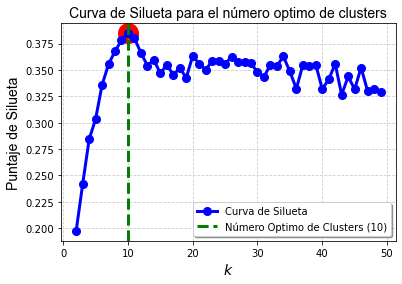

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## list comprehension para hacer fit a 49 modelos distintos que contienen desde 1 hasta 49 clusters
kmeans_per_k = [KMeans(n_clusters=k).fit(df_para_modelo) for k in range(1,50)]

## list comprehension para calcular el puntaje de silueta para cada uno de los modelos en la lista anterior
sil_scores = [silhouette_score(df_para_modelo, model.labels_) for model in kmeans_per_k[1:]]


## graficar los diferenets puntajes
plot = plt.plot(range(2,50), sil_scores, "bo-", color = "blue", linewidth = 3, markersize = 8, label = 'Curva de Silueta')
plot = plt.xlabel("$k$", fontsize = 14, family='Arial')
plot = plt.ylabel("Puntaje de Silueta", fontsize = 14, family='Arial')
plot = plt.grid(which = 'major', color = '#cccccc', linestyle = '--')
plot = plt.title('Curva de Silueta para el número optimo de clusters', family = 'Arial', fontsize =14)

k = np.argmax(sil_scores) +2

## graficar linea hacia puntaje optimo
plot = plt.axvline(x = k, linestyle = '--', c = 'green', linewidth = 3, label ='Número Optimo de Clusters ({})'.format(k))

## marcar lugar donde se encuentra el puntaje optimo
plot = plt.scatter(k, sil_scores[k-2], c = 'red', s = 400)
plot = plt.legend(shadow = True)
plot = plt.show

# Conteo de frecuencias de cada grupo 

In [30]:
## fit y predict de modelo con el número optimo de clusters según el paso anterior
modelo = KMeans(n_clusters = 10,init='k-means++' )
modelo.fit(df_para_modelo) 

#listado de etiquetas dadas por el modelo
labels = modelo.predict(df_para_modelo)

In [31]:
## crear diccionario para realizar el conteo de frecuencia de cada elemento
conteo = {}
for i in range(len(labels)):
    if labels[i] in conteo:
        conteo[labels[i]] += 1
    else:
        conteo[labels[i]] = 0

for key in conteo:
    conteo[key] = conteo[key] / len(labels)*100

conteo

{2: 17.346938775510203,
 9: 3.4256559766763846,
 0: 16.107871720116616,
 1: 10.787172011661808,
 8: 8.965014577259476,
 5: 6.63265306122449,
 3: 12.682215743440233,
 4: 11.51603498542274,
 7: 5.97667638483965,
 6: 5.830903790087463}

# Conclusiones

1. Se logro la creación de una tabla con información agregada por cliente, aplicando técnicas de limpieza de datos y feature engineering; con esto pasamos de más de 5000 observaciones, a un poco más de 1300.
2. La categorización de los productos y la creación de las columnas de gasto por categoria con respecto a total gastado demostro ser de alta importancia al ser posible encontrar grupos de clientes marcados según su comportamiento en estas dimensiones.
3. Las metricas agregadas de fecha y consumo pueden otorgar caracteristicas adicionales de relevancia al momento de crear estrategias de comuniación
4. Se encuentran 10 grupos de clientes claramente diferenciados, donde ninguno de los grupos supera el 18% del total de observaciones, y el top 5 se encuentra en el rango de 10% a 18% de las observaciones.

Por cuestiones de privacidad, se límita el resto de observaciones respecto a los grupos u otros resultados adicionales
